Importing packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
from statsmodels.tsa.arima_model import ARMA
from scipy.stats.distributions import chi2
import statsmodels.tsa.stattools as sts 
import seaborn as sns
sns.set()

Data Pre-processing

In [2]:
raw_csv_data = pd.read_csv("Index2020.csv") 
df_com=raw_csv_data.copy()
df_com.date = pd.to_datetime(df_com.date, dayfirst = True)
df_com.set_index("date", inplace=True)
df_com=df_com.asfreq('b')
df_com=df_com.fillna(method='ffill')

In [3]:
df_com['market_value']=df_com.dax

In [4]:
del df_com['spx']
size = int(len(df_com)*0.8)
df, df_test = df_com.iloc[:size], df_com.iloc[size:]

ACF

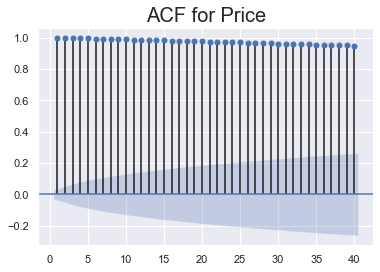

In [5]:
sgt.plot_acf(df.market_value, zero = False, lags = 40)
plt.title("ACF for Price", size = 20)
plt.show()
#similar to s&p500
#40 lagged coefficient are significant & declining
#all between 0.9 & 1.0;effects hardly deteriorate over time
#Both behave the same & past values affect present

PACF

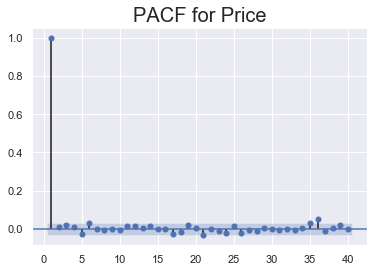

In [6]:
sgt.plot_pacf(df.market_value, lags = 40, alpha = 0.05, zero = False, method = ('ols'))
plt.title("PACF for Price", size =20)
plt.show()
#only include past lags which hv direct significant effect on present
#most of the coefficients from 25th lag onwards are not significant;Ignore?too close to 0;small model impact
#model < 25 lags
#values after 22nd lag are -ve;frequency is in business days ~~ 22days in month
#cyclical changes;values month ago affect today

AR1 Model

In [7]:
model_ar = ARMA(df.market_value, order = (1,0))
#1 is model no; no.of past values to incorporate
#0 is not taking any residual values
#simple autoregressive(AR) model

In [8]:
results_ar = model_ar.fit()

In [9]:
results_ar.summary()
#critical value for 95percent confidence internal is not zero;coefficients are significant
#phi=0.9991;near 1;as seen in ACF & PACF graph;
#p-value;If a value is significantly different from 0 it means based on the data,
#not enough evidence to confirm it isn't equal to 0
#Therefore,assume its coefficient is 0, so we don't use it to make estimates or forecasts

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 4192
Model:                     ARMA(1, 0)   Log Likelihood              -24819.095
Method:                       css-mle   S.D. of innovations             90.097
Date:                Wed, 12 Feb 2020   AIC                          49644.190
Time:                        19:54:17   BIC                          49663.212
Sample:                    01-03-2000   HQIC                         49650.917
                         - 01-26-2016                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               6378.0807   1374.467      4.640      0.000    3684.175    9071.986
ar.L1.market_value     0.9991      0.001   1583.885      0.000       0.998       1.000
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0009           +0.0000j            1.0009            0.0000
-----------------------------------------------------------------------------
"""

Higher-Lag AR Models

In [10]:
model_ar_2 = ARMA(df.market_value, order = (2,0))
results_ar_2 = model_ar_2.fit()
results_ar_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 4192
Model:                     ARMA(2, 0)   Log Likelihood              -24818.879
Method:                       css-mle   S.D. of innovations             90.093
Date:                Wed, 12 Feb 2020   AIC                          49645.758
Time:                        19:54:17   BIC                          49671.122
Sample:                    01-03-2000   HQIC                         49654.728
                         - 01-26-2016                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               6378.0887   1387.691      4.596      0.000    3658.264    9097.913
ar.L1.market_value     0.9890      0.015     64.500      0.000       0.959       1.019
ar.L2.market_value     0.0101      0.015      0.662      0.508      -0.020       0.040
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0009           +0.0000j            1.0009            0.0000
AR.2          -98.4517           +0.0000j           98.4517            0.5000
-----------------------------------------------------------------------------
"""

In [11]:
model_ar_3 = ARMA(df.market_value, order = (3,0))
results_ar_3 = model_ar_3.fit()
results_ar_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 4192
Model:                     ARMA(3, 0)   Log Likelihood              -24817.884
Method:                       css-mle   S.D. of innovations             90.071
Date:                Wed, 12 Feb 2020   AIC                          49645.768
Time:                        19:54:18   BIC                          49677.473
Sample:                    01-03-2000   HQIC                         49656.980
                         - 01-26-2016                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               6378.0787   1416.932      4.501      0.000    3600.942    9155.215
ar.L1.market_value     0.9888      0.015     64.547      0.000       0.959       1.019
ar.L2.market_value    -0.0114      0.022     -0.527      0.598      -0.054       0.031
ar.L3.market_value     0.0218      0.015      1.411      0.158      -0.008       0.052
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0008           -0.0000j            1.0008           -0.0000
AR.2           -0.2389           -6.7661j            6.7704           -0.2556
AR.3           -0.2389           +6.7661j            6.7704            0.2556
-----------------------------------------------------------------------------
"""

In [14]:
model_ar_4 = ARMA(df.market_value, order = (4,0))
results_ar_4 = model_ar_4.fit()
results_ar_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 4192
Model:                     ARMA(4, 0)   Log Likelihood              -24817.622
Method:                       css-mle   S.D. of innovations             90.065
Date:                Wed, 12 Feb 2020   AIC                          49647.245
Time:                        19:55:27   BIC                          49685.290
Sample:                    01-03-2000   HQIC                         49660.699
                         - 01-26-2016                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               6378.0793   1431.630      4.455      0.000    3572.137    9184.022
ar.L1.market_value     0.9885      0.015     64.546      0.000       0.958       1.019
ar.L2.market_value    -0.0113      0.022     -0.521      0.602      -0.054       0.031
ar.L3.market_value     0.0107      0.022      0.494      0.621      -0.032       0.053
ar.L4.market_value     0.0112      0.015      0.724      0.469      -0.019       0.041
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0008           -0.0000j            1.0008           -0.0000
AR.2            1.5930           -3.8492j            4.1658           -0.1875
AR.3            1.5930           +3.8492j            4.1658            0.1875
AR.4           -5.1470           -0.0000j            5.1470           -0.5000
-----------------------------------------------------------------------------
"""

In [15]:
model_ar_5 = ARMA(df.market_value, order = (5,0))
results_ar_5 = model_ar_5.fit()
results_ar_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 4192
Model:                     ARMA(5, 0)   Log Likelihood              -24816.424
Method:                       css-mle   S.D. of innovations             90.040
Date:                Wed, 12 Feb 2020   AIC                          49646.849
Time:                        19:56:07   BIC                          49691.236
Sample:                    01-03-2000   HQIC                         49662.545
                         - 01-26-2016                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               6378.0782   1401.004      4.553      0.000    3632.161    9123.996
ar.L1.market_value     0.9888      0.015     64.522      0.000       0.959       1.019
ar.L2.market_value    -0.0110      0.022     -0.508      0.611      -0.053       0.031
ar.L3.market_value     0.0105      0.022      0.483      0.629      -0.032       0.053
ar.L4.market_value     0.0349      0.022      1.603      0.109      -0.008       0.077
ar.L5.market_value    -0.0240      0.015     -1.548      0.122      -0.054       0.006
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0008           -0.0000j            1.0008           -0.0000
AR.2           -2.5005           -0.0000j            2.5005           -0.5000
AR.3            0.0883           -2.4486j            2.4502           -0.2443
AR.4            0.0883           +2.4486j            2.4502            0.2443
AR.5            2.7771           -0.0000j            2.7771           -0.0000
-----------------------------------------------------------------------------
"""

LLR Test

In [12]:
def LLR_test(mod_1, mod_2, DF=1):
    L1 = mod_1.llf
    L2 = mod_2.llf
    LR = (2*(L2-L1))
    p = chi2.sf(LR, DF).round(3)
    return p

In [13]:
model_ar_2 = ARMA(df.market_value, order = (2,0))
results_ar_2 = model_ar_2.fit()
print(results_ar_2.summary())
print("\nLLR test p-value = " + str(LLR_test(results_ar, results_ar_2)))

                              ARMA Model Results                              
Dep. Variable:           market_value   No. Observations:                 4192
Model:                     ARMA(2, 0)   Log Likelihood              -24818.879
Method:                       css-mle   S.D. of innovations             90.093
Date:                Wed, 12 Feb 2020   AIC                          49645.758
Time:                        19:54:18   BIC                          49671.122
Sample:                    01-03-2000   HQIC                         49654.728
                         - 01-26-2016                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               6378.0887   1387.691      4.596      0.000    3658.264    9097.913
ar.L1.market_value     0.9890      0.015     64.500      0.000       0.959       1.019
ar.L2.market_value  